# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [30]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)   
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [31]:
len(train)

"""Wszystkich próbek jest 2244"""

'Wszystkich próbek jest 2244'

In [32]:
len(train[train[:, 0] == 5])
s = sum(train[:, 0] == 5)
s
#moźna cunter

for i in range(1, 41):
    print(i, sum(train[:, 0] == i))

"""W niektórych klasach jest 0 próbek"""

1 77
2 66
3 55
4 66
5 77
6 44
7 44
8 33
9 121
10 88
11 88
12 77
13 99
14 66
15 66
16 0
17 0
18 0
19 0
20 0
21 0
22 121
23 77
24 77
25 66
26 99
27 55
28 66
29 110
30 77
31 77
32 66
33 66
34 99
35 88
36 33
37 0
38 0
39 0
40 0


'W niektórych klasach jest 0 próbek'

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [33]:
# <UZUPEŁNIJ>
train_new = train[(train[:, 0] == 3) | (train[:, 0] == 5)]
test_new = test[np.isin(test[:, 0], [3, 5])]


### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
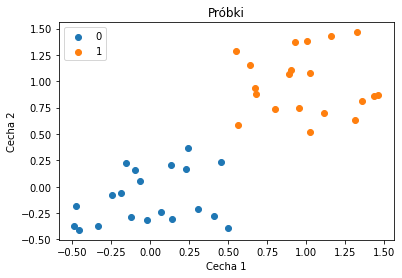

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

Text(0, 0.5, 'cecha 8')

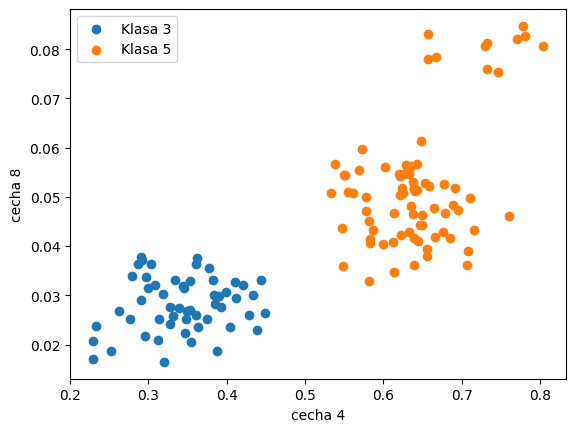

In [34]:
import matplotlib.pyplot as plt

klasy = [3, 5]
cechaX = 4
cechaY = 8

klasy = [3, 5]
for klasa in klasy:
    kl = train_new[train_new[:, 0] == klasa]
    X= kl[:, cechaX]
    Y = kl[:, cechaY]
    plt.scatter(X, Y, label=f"Klasa {klasa}")

plt.legend()
plt.xlabel(f"cecha {cechaX}")
plt.ylabel(f"cecha {cechaY}")

# kl_3 = train_new[train_new[:, 0] == 3]
# cechaX = kl_3[:, 4]
# cechaY = kl_3[:, 8]
# plt.scatter(cechaX, cechaY, label="Klasa 5")

# kl_5 = train_new[train_new[:, 0] == 5]
# cechaX = kl_5[:, 4]
# cechaY = kl_5[:, 8]
# plt.scatter(cechaX, cechaY, label="Klasa 5")
# plt.legend()
# plt.xlabel("cecha 4")
# plt.ylabel("cecha 8")

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `x` oraz `y` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [35]:
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
    
    return sum([(x[i] - y[i])**2 for i in features])**0.5

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [42]:
features = np.arange(2, 16)
classified_classes = []
for test_row in test:
    distance = [edist(test_row, train_row, features) for train_row in train]
    min_distance = min(distance)
    min_index = distance.index(min_distance)
    classified_classes.append(train[min_index, 0])

test_classes = test[:, 0]
correct = 0
incorrect = 0
for i in range(len(test_classes)):
    if classified_classes[i] == test_classes[i]:
        correct += 1
    else:
        incorrect += 1
accuracy = correct/len(test)
print(f"Accuracy {accuracy}")

Accuracy 0.5060160427807486


### Zadanie 7
Przeprowadź klasyfikację liści wybranych wcześniej (dwóch) klas korzystając z własnej implementacji modelu kNN, a następnie wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

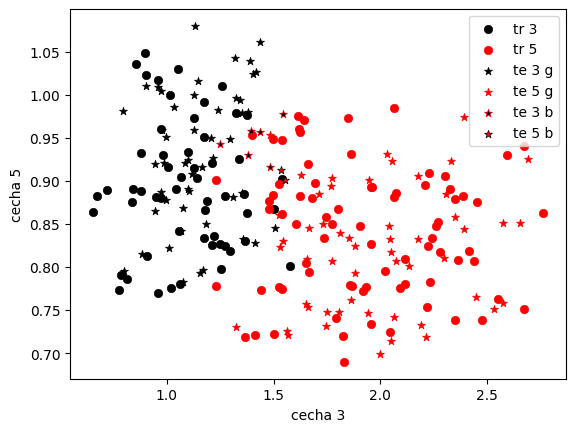

In [49]:
train_new = train[(train[:, 0] == 3) | (train[:, 0] == 5)]
test_new = test[np.isin(test[:, 0], [3, 5])]

features = [3, 5]
classified_classes = []
for test_row in test_new:
    distance = [edist(test_row, train_row, features) for train_row in train_new]
    min_distance = min(distance)
    min_index = distance.index(min_distance)
    classified_classes.append(train_new[min_index, 0])
    
test_classes = test_new[:, 0]
classified_classes_np = np.array(classified_classes)
test_classes_np = np.array(test_classes)
train_new_3 = train_new[train_new[:, 0] == 3]
train_new_5 = train_new[train_new[:, 0] == 5]

results_bad_3_np = test_new[(test_classes_np != classified_classes_np) & (test_classes_np == 3)]
results_bad_5_np = test_new[(test_classes_np != classified_classes_np) & (test_classes_np == 5)]
results_good_3_np = test_new[(test_classes_np == classified_classes_np) & (test_classes_np == 3)]
results_good_5_np = test_new[(test_classes_np == classified_classes_np) & (test_classes_np == 5)]

list_of_results = [train_new_3, train_new_5, results_good_3_np, results_good_5_np, results_bad_3_np, results_bad_5_np]
labels = ["tr 3", "tr 5", "te 3 g", "te 5 g", "te 3 b", "te 5 b"]
colors = ["black", "red", "black", "red", "black", "red"]
markers = ["o", "o", "*", "*", "*", "*"]
edgecolors = ["black", "red", "black", "red", "red", "black"]
for i, result_np in enumerate(list_of_results):
    X = result_np[:, features[0]]
    Y = result_np[:, features[1]]
    plt.scatter(X, Y, label=labels[i], facecolors=colors[i], marker=markers[i], edgecolors=edgecolors[i], linewidths=0.5)
plt.legend()
plt.xlabel(f"cecha {features[0]}")
plt.ylabel(f"cecha {features[1]}")
plt.show()

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [46]:
test_classes = test_new[:, 0]
correct = 0
incorrect = 0
for i in range(len(test_classes)):
    if classified_classes[i] == test_classes[i]:
        correct += 1
    else:
        incorrect += 1
accuracy = correct/(correct+incorrect)*100
print(f"Accuracy {accuracy:}")

Accuracy 92.72727272727272


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.


accuracy = 78.9


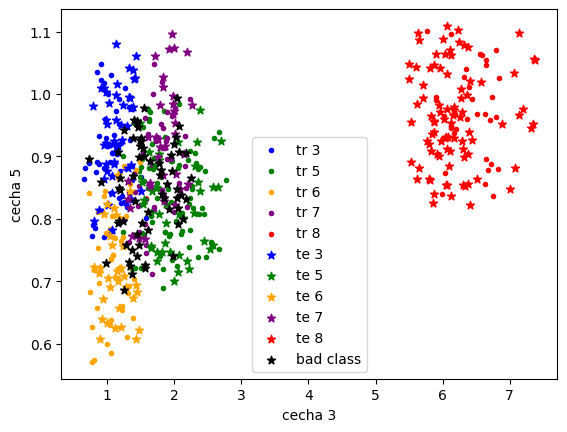

In [48]:
classes = [3, 5, 6, 7, 8]
features = [3, 5]
train_new = train[np.isin(train[:, 0], classes)]
test_new = test[np.isin(test[:, 0], classes)]
classified_classes = []

for test_row in test_new:
    distance = [edist(test_row, train_row, features) for train_row in train_new]
    min_distance = min(distance)
    min_index = distance.index(min_distance)
    classified_classes.append(train_new[min_index, 0])
test_classes = test_new[:, 0]
classified_classes_np = np.array(classified_classes)
test_classes_np = np.array(test_classes)
correct = np.sum(test_classes_np == classified_classes_np)
print(f"accuracy = {round(correct/len(test_classes_np), 4)*100}")

results = []
for i in classes:
    results.append(train_new[train_new[:, 0] == i])
for i in classes:
    results.append(test_new[(test_classes_np == classified_classes_np) & (test_classes_np == i)])
results.append(test_new[test_classes_np != classified_classes_np])

labels = ["tr 3", "tr 5", "tr 6", "tr 7", "tr 8", "te 3", "te 5", "te 6", "te 7", "te 8", "bad class"]
colors = ["blue", "green", "orange", "purple", "red", "blue", "green", "orange", "purple", "red", "black"]
markers = [".", ".", ".", ".", ".", "*", "*", "*", "*", "*", "*"]
for i, result_np in enumerate(results):
    X = result_np[:, features[0]]
    Y = result_np[:, features[1]]
    plt.scatter(X, Y, label=labels[i], c=colors[i], marker=markers[i])
plt.legend()
plt.xlabel(f"cecha {features[0]}")
plt.ylabel(f"cecha {features[1]}")
plt.show()


### Zadanie 10

Przeprowadź eksperyment ponownie dla takich samych parametrów jak w zad. 9, ale większej losowo wybranej liczby cech: 3, 5, 10.

> W tym przypadku nie wyświetlaj wykresu a jedynie oblicz dokładność klasyfikacji.

In [50]:
classes = [3, 5, 6, 7, 8]
features = [3, 5, 8]
train_new = train[np.isin(train[:, 0], classes)]
test_new = test[np.isin(test[:, 0], classes)]
classified_classes = []

for test_row in test_new:
    distance = [edist(test_row, train_row, features) for train_row in train_new]
    min_distance = min(distance)
    min_index = distance.index(min_distance)
    classified_classes.append(train_new[min_index, 0])
test_classes = test_new[:, 0]
classified_classes_np = np.array(classified_classes)
test_classes_np = np.array(test_classes)
correct = np.sum(test_classes_np == classified_classes_np)
print(f"accuracy = {round(correct/len(test_classes_np), 4)*100}")

accuracy = 85.06


In [51]:
features = [3, 5, 8, 10, 13]
classified_classes = []

for test_row in test_new:
    distance = [edist(test_row, train_row, features) for train_row in train_new]
    min_distance = min(distance)
    min_index = distance.index(min_distance)
    classified_classes.append(train_new[min_index, 0])
test_classes = test_new[:, 0]
classified_classes_np = np.array(classified_classes)
test_classes_np = np.array(test_classes)
correct = np.sum(test_classes_np == classified_classes_np)
print(f"accuracy = {round(correct/len(test_classes_np), 4)*100}")

accuracy = 86.69


In [52]:
features = [3, 4, 5, 7, 8, 9, 10, 12, 13, 15]
classified_classes = []

for test_row in test_new:
    distance = [edist(test_row, train_row, features) for train_row in train_new]
    min_distance = min(distance)
    min_index = distance.index(min_distance)
    classified_classes.append(train_new[min_index, 0])
test_classes = test_new[:, 0]
classified_classes_np = np.array(classified_classes)
test_classes_np = np.array(test_classes)
correct = np.sum(test_classes_np == classified_classes_np)
print(f"accuracy = {round(correct/len(test_classes_np), 4)*100}")

accuracy = 93.17999999999999


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
W przedstawionym przypadku zwiększenie ilości cech powoduję poprawę dokładności klasyfikacji, natomiast zależności tej nie można uznać za regułę.
Najprawdopodobniej istnieją cechy, które wpływają negatywnie na dokładność klasyfikacji.
Ponadto zwiększenie ilości cech znacząco zwiększa ilość obliczeń, które nie przekładają się liniowo na zyski parametru dokładności.

"""